## importing libraries

In [1]:
import numpy as np

In [2]:
#X data
X = np.array([
    [-2,4,-1],
    [4,1,-1],
    [1,2,-1],
    [2,0,-1],
    [0,0,-1],
    [3, 5,-1],
    [1, 6,-1],
    [5, 5,-1],
    [2, 4,-1],
    [6, 2,-1]
])
#Yi
Y = np.array([[-1],[-1],[-1],[-1],[-1],[1],[1],[1],[1],[1]])

In [3]:
from matplotlib import pyplot as plt
%matplotlib inline

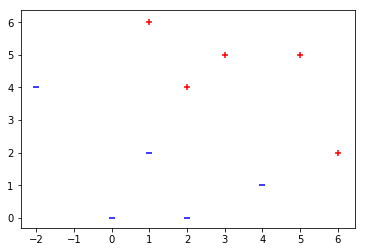

In [4]:
#Visualizing data
plt.scatter(X[0:5,0],X[0:5,1], c='b', marker='_', linewidths=2)
plt.scatter(X[5:10,0],X[5:10,1], c='r', marker='+', linewidths=2)

In [5]:
def omega(X,Y,epochs,eta,reg_param): #eta=learning rate, reg_param=regularization parameter, returns W final
    errors=[]
    W=np.zeros(X[0].size)
    #learning
    for epoch in range(epochs):
        error=0
        for i,example in enumerate(X):
            cost = 1 - Y[i]*(np.dot(X[i,:],W))   #Cost is the hinge loss. It is positive when example is classified incorrectly
            if cost > 0:
                #misclassified example
                W = W + eta*(Y[i]*X[i,:] - (2*reg_param*W))
                error=error+1
            else:
                #correctly classified example
                W = W - eta*(2*reg_param*W)
        errors.append(error)
    return W, errors

In [6]:
W,e = omega(X,Y,100000,1,0.00001)
#W is the normal vector to the hyperline
#W[2] is the bias term b so that Y*X.W is greater than 1

In [7]:
W

array([ 2.25388867,  5.41360949, 19.53789435])

In [9]:
# We found the slope above. Now to find a point through which the line passes which is the 
# midpoint of the closest positive and negative examples.
li=[]
li2=[]
for i,sample in enumerate(X):
    if np.dot(X[i], W) <=-1:
        li.append(np.dot(X[i], W))
    elif np.dot(X[i],W) >=1:
        li2.append(np.dot(X[i],W))
        #li contains all the negative samples
        #li2 contains all the positive samples
a=(X[0:len(li)][li.index(max(li))])
b=(X[len(li):][li.index(min(li))])
#a is closest negative
#b is closest positive
m=(a+b)/2
#m is a point on the hyper line

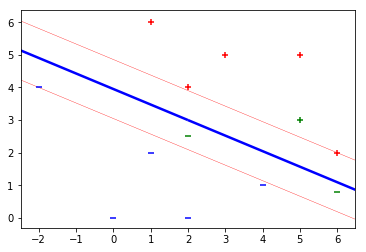

In [39]:
#Plotting the results
ax = plt.gca()
#Dark blue line is the hyperplane
ax.quiver(m[0],m[1],[W[1]],[-W[0]],scale=1, color='blue')
ax.quiver(m[0],m[1],[-W[1]],[W[0]],scale=1, color='blue')
#Light red line is the svm seprator
ax.quiver(a[0],a[1],[W[1]],[-W[0]],scale=1, color='red', width=0.001)
ax.quiver(b[0],b[1],[-W[1]],[W[0]],scale=1, color='red', width=0.001)
ax.quiver(a[0],a[1],[-W[1]],[W[0]],scale=1, color='red', width=0.001)
ax.quiver(b[0],b[1],[W[1]],[-W[0]],scale=1, color='red', width=0.001)
plt.scatter(X[0:5,0],X[0:5,1], c='b', marker='_', linewidths=2)
plt.scatter(X[5:10,0],X[5:10,1], c='r', marker='+', linewidths=2)

#test points(green)
tp=np.array([[2,2.5,-1],[6,0.8,-1],[5,3,-1]])

for i,samaple in enumerate(tp):
    if np.dot(tp[i],W)>0:
        plt.scatter(tp[i,0],tp[i,1], c='g', marker='+', linewidths=2)
    else:
        plt.scatter(tp[i,0],tp[i,1], c='g', marker='_', linewidths=2)

## Using sklearn

In [40]:
from sklearn import svm as svm
from matplotlib import style
style.use('ggplot')

In [41]:
#declaring model
clf = svm.SVC(kernel='linear', C=1)

In [42]:
#Fitting the data
clf.fit(X[:,0:2],Y.ravel())

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [43]:
clf.predict([[1,1],[9,9]])

array([-1,  1])

In [44]:
W2=clf.coef_

In [45]:
c=clf.intercept_

### for the median line given by ax+by + c =0 dividing the points, [a,b] are W2 and intercept is c

In [47]:
xx=np.array([-3,8])
yy= (-W2[0,0]/W2[0,1])*xx - (c/W2[0,1])


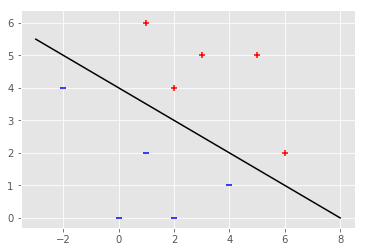

In [48]:
plt.plot(xx,yy,'k-')
plt.scatter(X[0:5,0],X[0:5,1], c='b', marker='_', linewidths=2)
plt.scatter(X[5:10,0],X[5:10,1], c='r', marker='+', linewidths=2)

In [9]:
5

5

In [3]:
6

6